a:  3.0742857142857147 b:  0.02380952380952328


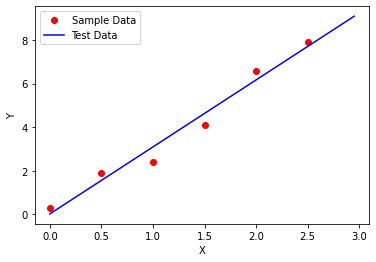

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

X = [0, 0.5, 1.0, 1.5, 2.0, 2.5]
Y = [0.3, 1.9, 2.4, 4.1, 6.6, 7.9]

x_mean = sum(X) / len(X)
y_mean = sum(Y) / len(Y)

division = sum((y - y_mean) * (x - x_mean) for y,x in list(zip(Y, X)))
divisor = sum((x - x_mean)**2 for x in X)
a = division / divisor
b = y_mean - a * x_mean

new_X = np.arange(0, 3, 0.05)
new_Y = a * new_X + b

print('a: ', a, 'b: ', b)

plt.plot(X,Y, 'ro', label = 'Sample Data')
plt.plot(new_X, new_Y, 'b-',label = 'Test Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

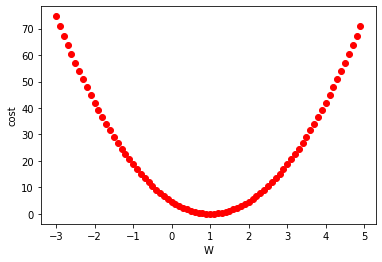

In [ ]:
X = [1,2,3]
Y = [1,2,3]
W_val = []
cost_val = []
X = tf.cast(X, tf.float32)
for feed_w in tf.range(-3, 5, 0.1):
  hypothesis = X * feed_w
  cost = tf.reduce_mean(tf.square(hypothesis - Y))
  W_val.append(feed_w)
  cost_val.append(cost)
plt.plot(W_val, cost_val, 'ro')
plt.xlabel('W')
plt.ylabel('cost')
plt.show()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
5004 [3.0648296] [0.03810889] 0.19743639
5005 [3.0648391] [0.03809444] 0.19743626
5006 [3.0648487] [0.03808001] 0.19743608
5007 [3.0648582] [0.03806559] 0.19743598
5008 [3.0648677] [0.03805119] 0.19743581
5009 [3.0648773] [0.0380368] 0.19743568
5010 [3.0648868] [0.03802243] 0.19743551
5011 [3.0648963] [0.03800806] 0.1974354
5012 [3.064906] [0.03799372] 0.19743524
5013 [3.0649154] [0.03797939] 0.19743508
5014 [3.064925] [0.03796507] 0.19743495
5015 [3.0649345] [0.03795077] 0.1974348
5016 [3.064944] [0.03793648] 0.19743466
5017 [3.0649536] [0.0379222] 0.19743453
5018 [3.064963] [0.03790794] 0.19743438
5019 [3.0649726] [0.03789369] 0.19743426
5020 [3.064982] [0.03787946] 0.19743419
5021 [3.0649912] [0.03786524] 0.19743402
5022 [3.0650005] [0.03785103] 0.19743384
5023 [3.0650098] [0.03783684] 0.19743367
5024 [3.0650191] [0.03782267] 0.19743353
5025 [3.0650284] [0.03780851] 0.19743347
5026 [3.0650377] [0.03779436] 0.19743331
5027 [3.065047] [0.03778023] 0

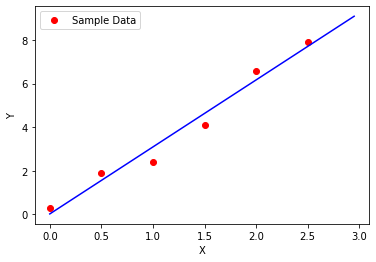

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

X = [0, 0.5, 1.0, 1.5, 2.0, 2.5]
Y = [0.3, 1.9, 2.4, 4.1, 6.6, 7.9]

W = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random.uniform([1], -1.0, 1.0))

#GD
#optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate = 0.1)
#SGD
#optimizer = tf.optimizers.SGD(learning_rate = 0.1)
#ADAM
#optimizer = tf.optimizers.Adam(learning_rate = 0.1)
#adaGrad
optimizer = tf.optimizers.Adagrad(learning_rate = 0.1)
#adaDelta
#optimizer = tf.optimizers.Adadelta(learning_rate = 0.1)
#RMSProp
#optimizer = tf.optimizers.RMSprop(learning_rate = 0.1)

@tf.function()
def cost_eval():
  hypothesis = W * X + b
  cost = tf.reduce_mean(tf.square(hypothesis - Y))
  return cost

print("epoch  W  b  cost")
for epoch in range(10000):
  optimizer.minimize(cost_eval,var_list = [W, b])
  print(epoch, W.numpy(), b.numpy(), cost_eval().numpy())
print("\n==== Test ====")
x=5
print('X: ', x, 'Y: ', (W*x+b).numpy())
x=2.5
print('X: ', x, 'Y: ', (W*x+b).numpy())

new_X = tf.range(0,3,0.05)
new_Y = W*new_X + b

plt.plot(X, Y, 'ro', label = 'Sample Data')
plt.plot(new_X, new_Y, 'b-')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

epoch  a0  a1  a2  cost
0 [0.78945655] [-0.22767732] [-0.16371143] 24.74301
1 [0.8648628] [-0.07879724] [0.15042354] 13.727702
2 [0.92064106] [0.03192386] [0.38307443] 7.677613
3 [0.9618726] [0.11436477] [0.55533767] 4.354583
4 [0.99232304] [0.17584667] [0.68284774] 2.5293434
5 [1.0147833] [0.22179532] [0.7771915] 1.5267395
6 [1.0313214] [0.25623176] [0.84695596] 0.9759539
7 [1.0434704] [0.282136] [0.8985049] 0.67332166
8 [1.0523661] [0.3017165] [0.93655473] 0.5069836
9 [1.0588505] [0.31661] [0.96460056] 0.4155029

==== Test ====
X:  5 Y:  [1.0588505 1.4583057 2.3400612 3.7041168 5.5504727 7.879129 ]
X:  2.5 Y:  [1.0588505 1.4583057 2.3400612 3.7041168 5.5504727 7.879129 ]


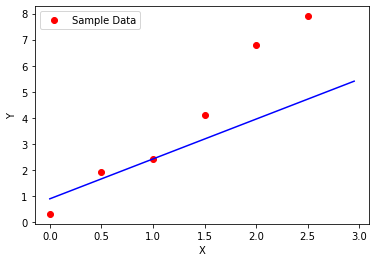

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

X = tf.constant([0, 0.5, 1.0, 1.5, 2.0, 2.5])
Y = tf.constant([0.3,1.9,2.4,4.1,6.8,7.9])

a0 = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
a1 = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
a2 = tf.Variable(tf.random.uniform([1], -1.0, 1.0))

#GD
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate = 0.01)
#SGD
#optimizer = tf.optimizers.SGD(learning_rate = 0.01)
#ADAM
#optimizer = tf.optimizers.Adam(learning_rate = 0.07)

@tf.function
def cost_eval():
  hypothesis = a0 + a1 * X + a2 * X**2
  cost = tf.reduce_mean(tf.square(hypothesis - Y))
  return cost

print("epoch  a0  a1  a2  cost")
for epoch in range(0,10,1):
  optimizer.minimize(cost_eval,var_list = [a0, a1, a2])
  print(epoch, a0.numpy(), a1.numpy(), a2.numpy(), cost_eval().numpy())
print("\n==== Test ====")
x = 5
print('X: ', x, 'Y: ', (a0 + a1 * X + a2 * X**2).numpy())
x= 2.5
print('X: ', x, 'Y: ', (a0 + a1 * X + a2 * X**2).numpy())

new_X = tf.range(0,3,0.05)
new_Y = W*new_X + b

plt.plot(X, Y, 'ro', label = 'Sample Data')
plt.plot(new_X, new_Y, 'b-')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()